# Import Libraries

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import LinearSVC, SVC
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras.utils import to_categorical

# Load Data and get data shape

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
n_samples, nx, ny = x_train.shape
n_samples_test, nx_test, ny_test = x_test.shape

# Predict digits with sklearn SVM model

###  Reshape data to 2d for SVM

In [8]:
x_train_svm = x_train.reshape((n_samples, nx * ny))
x_test_svm = x_test.reshape((n_samples_test, nx_test * ny_test))

### Create and train the model

In [9]:
svm = SVC()
svm.fit(x_train_svm, y_train);

### Predict

In [10]:
y_pred_svm = svm.predict(x_test_svm)

### Print accuracy and plot the Confusion matrix

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000




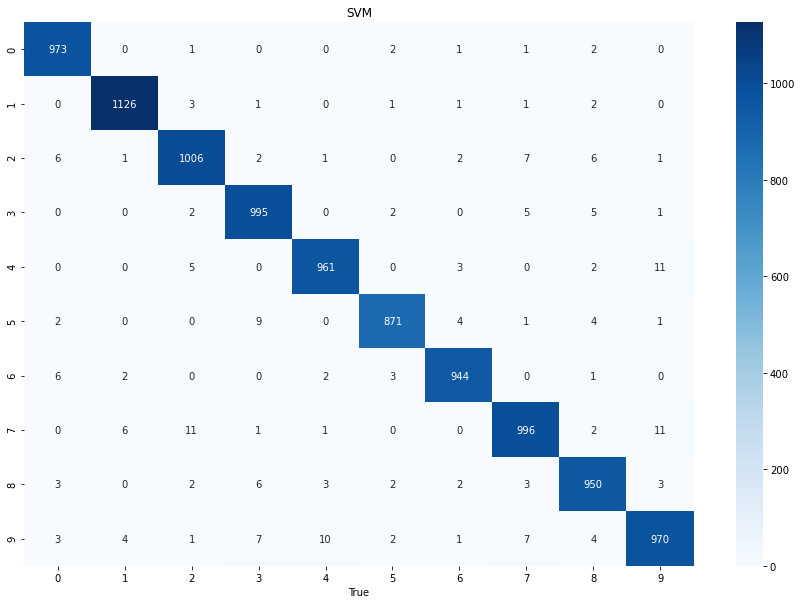

In [11]:
print(f"Classification report for classifier {svm}:\n"
      f"{classification_report(y_test, y_pred_svm)}\n")

mtx = confusion_matrix(y_test, y_pred_svm)

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(mtx, annot=True, fmt='d', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('SVM');

# Predict digits with Fully Connected Network

### Prepare the data

In [19]:
x_train_fcn = x_train / 255.0
x_test_fcn = x_test / 255.0
x_train_fcn = x_train.reshape((n_samples, nx * ny))
x_test_fcn = x_test.reshape((n_samples_test, nx_test * ny_test))

In [20]:
y_train_fcn = to_categorical(y_train)
y_test_fcn = to_categorical(y_test)

### Create the Model

In [21]:
fcn = Sequential()
fcn.add(Dense(128, activation='relu', input_shape=(x_train_fcn.shape[1],)))
fcn.add(Dense(128, activation='relu'))
fcn.add(Dropout(0.25))
fcn.add(Dense(10, activation='softmax'))

### Compile the model

In [22]:
fcn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the Model

In [26]:
hist = fcn.fit(x_train_fcn, y_train_fcn, epochs=3, batch_size=512, verbose=0)

In [27]:
y_pred_fcn = fcn.predict(x_test_fcn)
y_pred_fcn = np.argmax(y_pred_fcn, axis=-1)

### Print Confusion Matrix

Classification report for Fully Connected Network:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.98      1135
           2       0.94      0.93      0.93      1032
           3       0.93      0.92      0.92      1010
           4       0.94      0.92      0.93       982
           5       0.91      0.91      0.91       892
           6       0.96      0.94      0.95       958
           7       0.96      0.92      0.94      1028
           8       0.89      0.92      0.90       974
           9       0.90      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000




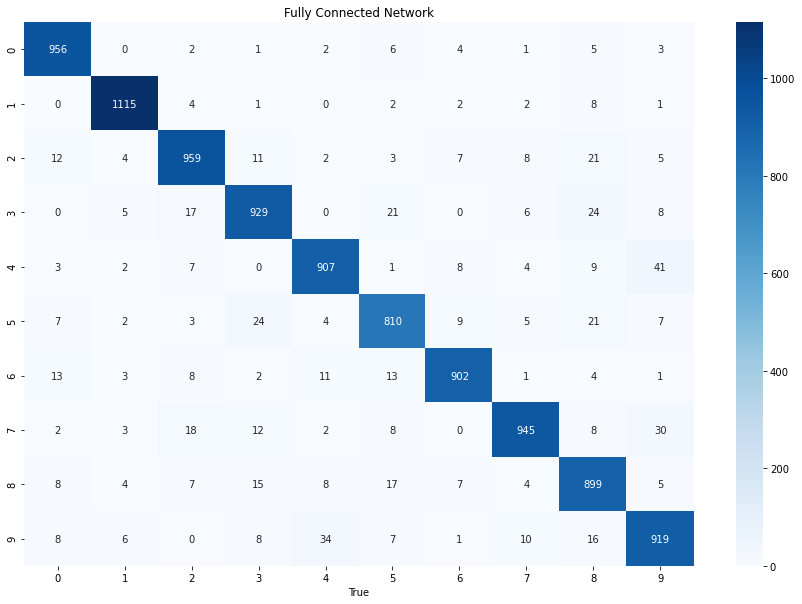

In [28]:
print(f"Classification report for Fully Connected Network:\n"
      f"{classification_report(y_test, y_pred_fcn)}\n")

mtx = confusion_matrix(y_test, y_pred_fcn)

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(mtx, annot=True, fmt='d', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Fully Connected Network');